In [39]:
#import necessary libraries
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset into a pandas DataFrame, specifying the date format as DD-MM-YYYY
df = pd.read_csv('Walmart.csv', parse_dates=['Order Date', 'Ship Date'], dayfirst=True)

In [40]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [43]:
columns = list(df.columns)
for col in columns:
    print(col)
# Convert the order date column to a datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce')

# Create a new column for the month
df['Month'] = df['Order Date'].dt.strftime('%Y-%m')
df.head()

Order ID
Order Date
Ship Date
Customer Name
Country
City
State
Category
Product Name
Sales
Quantity
Profit
Month


,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,Month
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013-06
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011-06
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011-06
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011-06
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011-06


In [10]:
# Check for any missing values in the dataset
print(df.isnull().sum())

Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Country          0
City             0
State            0
Category         0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64


In [11]:
# Check for any duplicates in the dataset
print(df.duplicated().sum())

0


In [14]:
# Calculate overall sales revenue and profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
# Print the overall sales revenue and profit
print('Total Sales: ${:,.2f}'.format(total_sales))
print('Total Profit: ${:,.2f}'.format(total_profit))

Total Sales: $725,457.93
Total Profit: $108,418.79


In [15]:
# Calculate sales revenue and profit by product category
category_sales = df.groupby('Category')['Sales'].sum()
category_profit = df.groupby('Category')['Profit'].sum()

# Print sales revenue and profit by product category
print('\nSales by Category:')
print(category_sales)
print('\nProfit by Category:')
print(category_profit)


Sales by Category:
Category
Accessories     61114.10
Appliances      30236.32
Art              9212.06
Binders         55961.11
Bookcases       36004.18
Chairs         101781.36
Copiers         49749.23
Envelopes        4118.10
Fasteners         923.20
Furnishings     30072.73
Labels           5078.72
Machines        42444.14
Paper           26663.73
Phones          98684.39
Storage         70532.84
Supplies        18127.12
Tables          84754.60
Name: Sales, dtype: float64

Profit by Category:
Category
Accessories    16484.62
Appliances      8261.29
Art             2374.15
Binders        16096.78
Bookcases      -1646.50
Chairs          4027.62
Copiers        19327.25
Envelopes       1908.71
Fasteners        275.19
Furnishings     7641.26
Labels          2303.07
Machines        -618.95
Paper          12119.10
Phones          9111.06
Storage         8645.49
Supplies         626.11
Tables          1482.54
Name: Profit, dtype: float64


In [16]:
# Calculate average sales revenue and profit per order
avg_sales_per_order = df.groupby('Order ID')['Sales'].sum().mean()
avg_profit_per_order = df.groupby('Order ID')['Profit'].sum().mean()

# Print average sales revenue and profit per order
print('\nAverage Sales per Order: ${:,.2f}'.format(avg_sales_per_order))
print('Average Profit per Order: ${:,.2f}'.format(avg_profit_per_order))


Average Sales per Order: $450.32
Average Profit per Order: $67.30


In [17]:
# Calculate total spending by customer
customer_spending = df.groupby('Customer Name')['Sales'].sum()

# Sort the results in descending order
customer_spending = customer_spending.sort_values(ascending=False)

# Print top 10 customers by total spending
print('\nTop 10 Customers by Total Spending:')
print(customer_spending.head(10))


Top 10 Customers by Total Spending:
Customer Name
Raymond Buch      14345.28
Ken Lonsdale       8472.39
Edward Hooks       7447.77
Jane Waco          7391.53
Karen Ferguson     7182.76
Nick Crebassa      6734.23
Clay Ludtke        6069.65
Yana Sorensen      5754.17
Nora Preis         5564.60
William Brown      5523.06
Name: Sales, dtype: float64


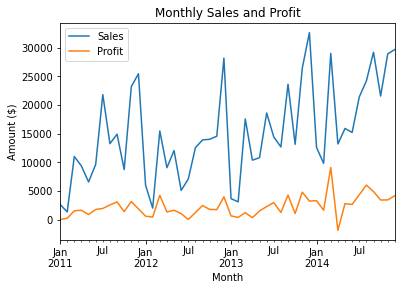

In [44]:
# Plot the trend of sales revenue and profit over time
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)
monthly_sales = df.resample('M')['Sales'].sum()
monthly_profit = df.resample('M')['Profit'].sum()
monthly_sales.plot()
monthly_profit.plot()
plt.legend()
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Monthly Sales and Profit')
plt.show()

In [24]:
correlation = df[['Sales', 'Quantity', 'Profit']].corr()
print(correlation)

             Sales  Quantity    Profit
Sales     1.000000  0.214665  0.647477
Quantity  0.214665  1.000000  0.093240
Profit    0.647477  0.093240  1.000000


<AxesSubplot:xlabel='Category', ylabel='Profit'>

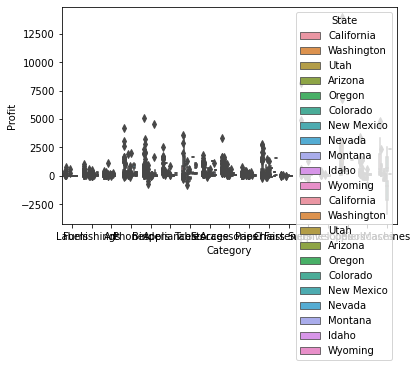

In [31]:
sns.boxplot(x='Category', y='Sales', hue='State', data=df)
sns.boxplot(x='Category', y='Profit', hue='State', data=df)

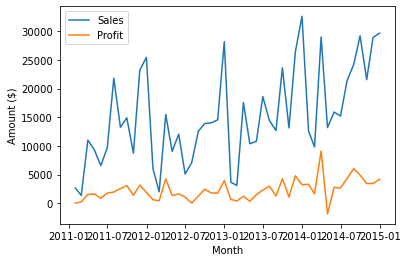

In [45]:

# Plot monthly sales revenue and profit
plt.plot(monthly_sales.index, monthly_sales.values, label='Sales')
plt.plot(monthly_profit.index, monthly_profit.values, label='Profit')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.show()


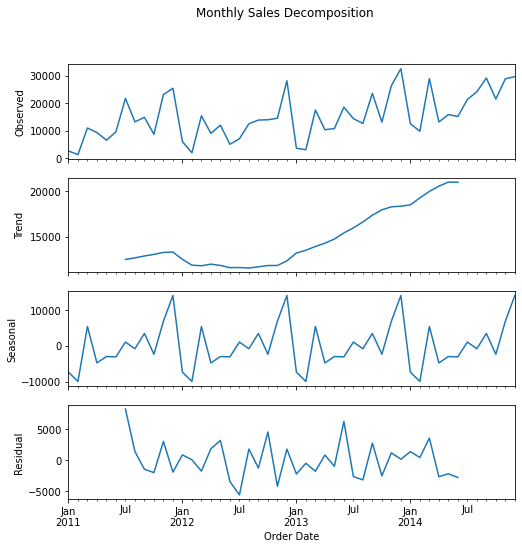

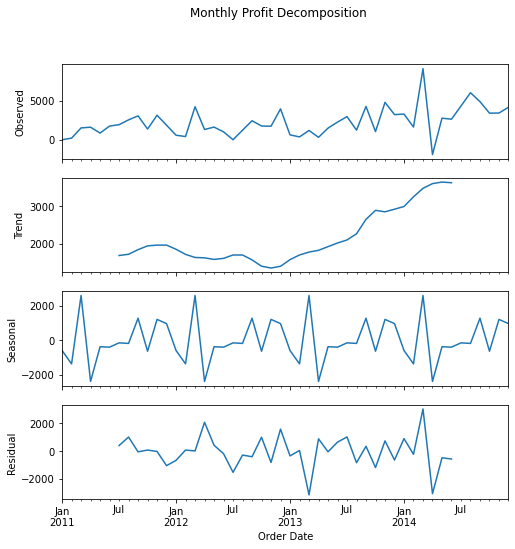

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose monthly sales revenue and profit
sales_decomp = seasonal_decompose(monthly_sales, period=12)
profit_decomp = seasonal_decompose(monthly_profit, period=12)

# Plot the decomposed components
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8, 8))
sales_decomp.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
sales_decomp.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
sales_decomp.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
sales_decomp.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.suptitle('Monthly Sales Decomposition')
plt.show()

fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8, 8))
profit_decomp.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
profit_decomp.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
profit_decomp.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
profit_decomp.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.suptitle('Monthly Profit Decomposition')
plt.show()